# Proyek Sistem Rekomendasi Game

Proyek yang digunakan kali ini adalah Sistem Rekomendasi pada Game Steam. Proyek ini bertujuan untuk memberikan rekomendasi game kepada suatu pengguna.

Dataset yang diambil adalah: https://www.kaggle.com/datasets/jahnavipaliwal/video-game-reviews-and-ratings

# Masukin Dataset

In [2]:
# Upload kaggle.json (jalankan ini dan upload file-nya saat diminta)
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"astars27","key":"2e92fada7b6d8479b49c78715caa705a"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
# Remove the existing folder if it exists
!rm -rf video-game-reviews-and-ratings
# Download the dataset using the Kaggle API
!kaggle datasets download -d jahnavipaliwal/video-game-reviews-and-ratings
# Extract the downloaded zip file
!unzip video-game-reviews-and-ratings.zip -d video-game-reviews-and-ratings

Dataset URL: https://www.kaggle.com/datasets/jahnavipaliwal/video-game-reviews-and-ratings
License(s): apache-2.0
video-game-reviews-and-ratings.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  video-game-reviews-and-ratings.zip
  inflating: video-game-reviews-and-ratings/video_game_reviews.csv  


# Data Collection


File yang diperoleh dari dataset ini adalah video games review.csv dengan jumlah data game adalah 47774

In [4]:
# Impor Library yang dibutuhkan untuk disajikan dalam tabel
import pandas as pd
# Buatlah definisi dari masing-masing csv
games = pd.read_csv('/content/video-game-reviews-and-ratings/video_game_reviews.csv')
# Tunjukkan hasil jumlah data game, data rekomendasi, dan data user
print('Jumlah data games: ', len(games))

Jumlah data games:  47774


In [5]:
# Sekarang tunjukkan tabel pada file game
games

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(column, errors="raise")


,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47769,Minecraft,41.6,All Ages,49.11,PlayStation,Yes,Valve,Innersloth,2016,Party,No,56.7,Low,Excellent,Average,"Amazing game, but the graphics could be better.",Online,4
47770,The Legend of Zelda: Breath of the Wild,24.2,Kids,31.69,Xbox,Yes,Valve,Electronic Arts,2023,Strategy,No,29.7,High,Good,Excellent,"Solid game, but the graphics could be better.",Offline,1
47771,Animal Crossing: New Horizons,26.7,All Ages,44.90,PlayStation,Yes,Game Freak,Square Enix,2018,Sports,No,8.2,Low,Poor,Good,"Great game, but the gameplay is amazing.",Offline,5
47772,The Legend of Zelda: Breath of the Wild,22.5,Kids,29.99,Xbox,Yes,Epic Games,Epic Games,2018,Simulation,Yes,29.7,High,Poor,Excellent,"Disappointing game, but the graphics could be ...",Offline,1


In [6]:
# Berikan info kolom dan jumlah data pada game
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   Price                    47774 non-null  float64
 4   Platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   Developer                47774 non-null  object 
 7   Publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   Genre                    47774 non-null  object 
 10  Multiplayer              47774 non-null  object 
 11  Game Length (Hours)      47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality         

Berikut ini adalah penjelasan informasi dari data video game ini:

1. Game Title: Nama game.

2. User Rating: Rating yang Rating yang diberikan oleh pengguna, dalam format float.

3. Age Group Targeted: Kelompok usia yang menjadi target game.

4. Price: Harga game, dalam format float.

5. Platform: Platform tempat game tersedia (misalnya, PC, PlayStation, Xbox).

6. Requires Special Device: Apakah game memerlukan perangkat khusus (misalnya, VR headset).

7. Developer: Pengembang game.

8. Publisher: Penerbit game.

9. Release Year: Tahun rilis game.

10. Genre: Genre atau kategori game (misalnya, Action, Adventure, RPG).

11. Multiplayer: Apakah game mendukung mode multiplayer.

12. Game Length (Hours): Durasi permainan dalam jam.

13. Graphics Quality: Kualitas grafis game.

14. Soundtrack Quality: Kualitas soundtrack game.

15. Story Quality: Kualitas cerita game.

16. User Review Text: Teks ulasan dari pengguna.

17. Game Mode: Mode permainan (misalnya, Single Player, Multiplayer).

18. Min Number of Players: Jumlah minimum pemain yang diperlukan untuk memainkan game.

 informasi tentang game "Spelunky 2"

In [36]:
# Mencari dan menampilkan data game "Spelunky 2"
spelunky = games[games['Game Title'] == 'Spelunky 2']

print("Data game Spelunky 2:")
print(spelunky)


Data game Spelunky 2:
       Game Title  User Rating Age Group Targeted  Price         Platform  \
10     Spelunky 2         29.3             Adults  27.76           Mobile   
20     Spelunky 2         30.7           All Ages  45.94               PC   
37     Spelunky 2         36.4             Adults  35.69      PlayStation   
49     Spelunky 2         32.7              Teens  48.32           Mobile   
121    Spelunky 2         23.3               Kids  25.50      PlayStation   
...           ...          ...                ...    ...              ...   
47668  Spelunky 2         44.0              Teens  53.69               PC   
47688  Spelunky 2         34.5             Adults  55.17  Nintendo Switch   
47715  Spelunky 2         14.1             Adults  27.60             Xbox   
47732  Spelunky 2         20.6           All Ages  32.60               PC   
47759  Spelunky 2         18.2               Kids  31.08  Nintendo Switch   

      Requires Special Device       Developer        

Sepertinya tidak ada data yang kosong dan aman untuk dianalisis.

In [7]:
# Menunjukkan Jumlah game dan judul game
print('Jumlah Game: ', len(games['Game Title'].unique()))
print('Judul Game: ', games['Game Title'].unique())

Jumlah Game:  40
Judul Game:  ['Grand Theft Auto V' 'The Sims 4' 'Minecraft' 'Bioshock Infinite'
 'Half-Life: Alyx' 'Sid Meier’s Civilization VI' 'Just Dance 2024'
 '1000-Piece Puzzle' 'Spelunky 2' 'Street Fighter V' 'Fall Guys'
 'Rocket League' 'The Elder Scrolls V: Skyrim' 'Among Us' 'Stardew Valley'
 'Call of Duty: Modern Warfare 2'
 'The Legend of Zelda: Breath of the Wild' 'Tekken 7'
 'Pillars of Eternity II: Deadfire' 'Animal Crossing: New Horizons'
 'Hades' 'Mario Kart 8 Deluxe' 'Overwatch 2' 'Fortnite'
 'Pokémon Scarlet & Violet' 'Hitman 3' 'Tomb Raider (2013)'
 'Halo Infinite' 'Super Smash Bros. Ultimate' 'Kingdom Hearts III'
 'League of Legends' 'The Witcher 3: Wild Hunt' 'FIFA 24'
 'Ghost of Tsushima' 'Cuphead' 'Red Dead Redemption 2' 'Portal 2' 'Tetris'
 'Counter-Strike: Global Offensive' 'Super Mario Odyssey']


Data yang dtunjukkan adalah data user review dari angka 1 sampai 50 dimana angka 50 adalah angka tertinggi dalam user review.

In [8]:
# Menunjukkan Harga game dan rating user game
print('Jumlah Harga Game: ', len(games['Price'].unique()))
print('Harga Game: ', games['Price'].unique())

Jumlah Harga Game:  4001
Harga Game:  [41.41 57.56 44.93 ... 56.9  48.93 28.91]


In [9]:
# Cek apakah datanya duplikat atau tidak
games.duplicated().sum()

0

In [10]:
# Deskripsi Game
games.describe()

,User Rating,Price,Release Year,Game Length (Hours),Min Number of Players
count,47774.000000,47774.000000,47774.000000,47774.000000,47774.000000
mean,29.719329,39.951371,2016.480952,32.481672,5.116758
std,7.550131,11.520342,4.027276,15.872508,2.769521
min,10.100000,19.990000,2010.000000,5.000000,1.000000
25%,24.300000,29.990000,2013.000000,18.800000,3.000000
50%,29.700000,39.845000,2016.000000,32.500000,5.000000
75%,35.100000,49.957500,2020.000000,46.300000,7.000000
max,49.500000,59.990000,2023.000000,60.000000,10.000000


# Exploratory Data Analysis

Data yang dianalisis yakni: <br>
1. Jumlah Game <br>
2. User Rating pakai Plot <br>
3. Jumlah Game di umur berapa <br>



Karena data ini sangat banyak dan bisa menyebabkan crash untuk dianalisis, maka data ini harus difilter sampai 5000 data.

In [11]:
# Impor library yang dibutuhkan untuk Analisis Uunivariat
import matplotlib.pyplot as plt
import seaborn as sns

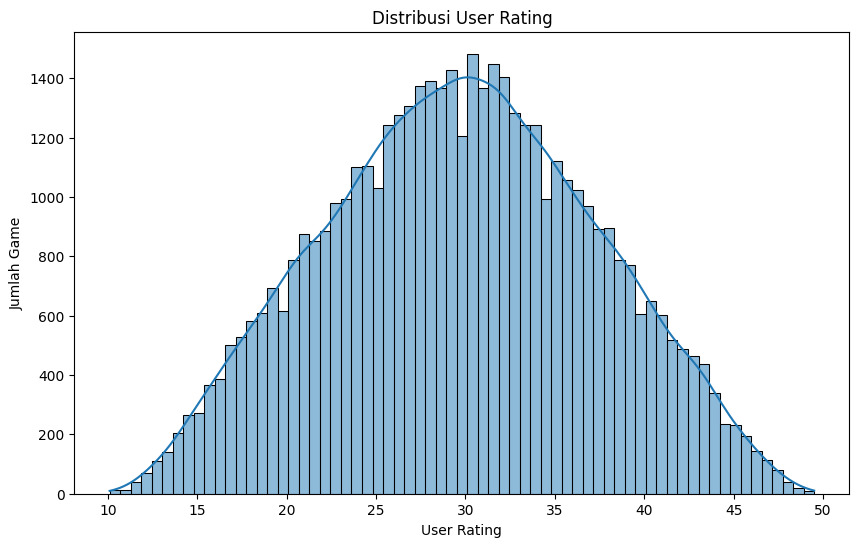

In [12]:
# Analisis Univariat User Rating
plt.figure(figsize=(10, 6))
sns.histplot(games['User Rating'], kde=True)
plt.title('Distribusi User Rating')
plt.xlabel('User Rating')
plt.ylabel('Jumlah Game')
plt.show()

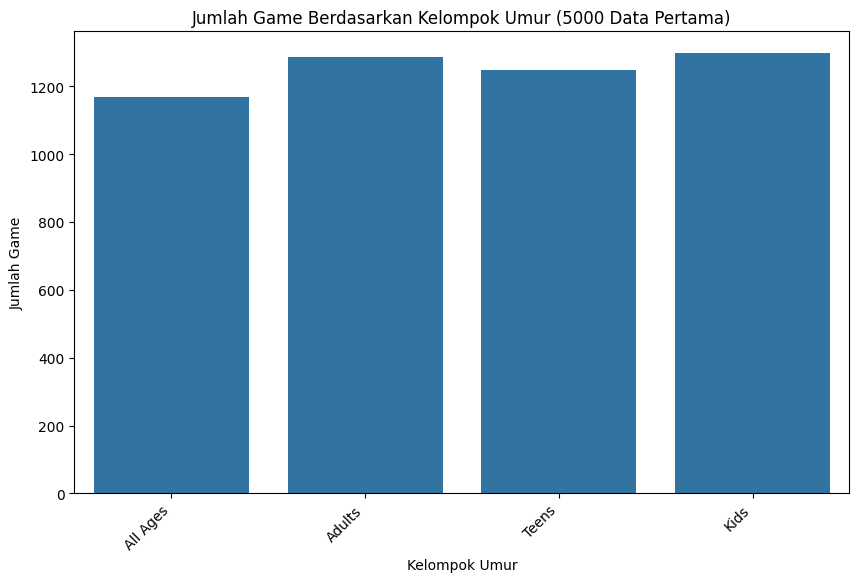

In [13]:
# prompt: Jumlah Game di Umur berapa

# Analisis Univariat Jumlah Game di Umur Berapa
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group Targeted', data=games.head(5000))  # Limit to 5000 rows
plt.title('Jumlah Game Berdasarkan Kelompok Umur (5000 Data Pertama)')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Game')
plt.xticks(rotation=45, ha='right') # Rotasi label agar lebih mudah dibaca
plt.show()

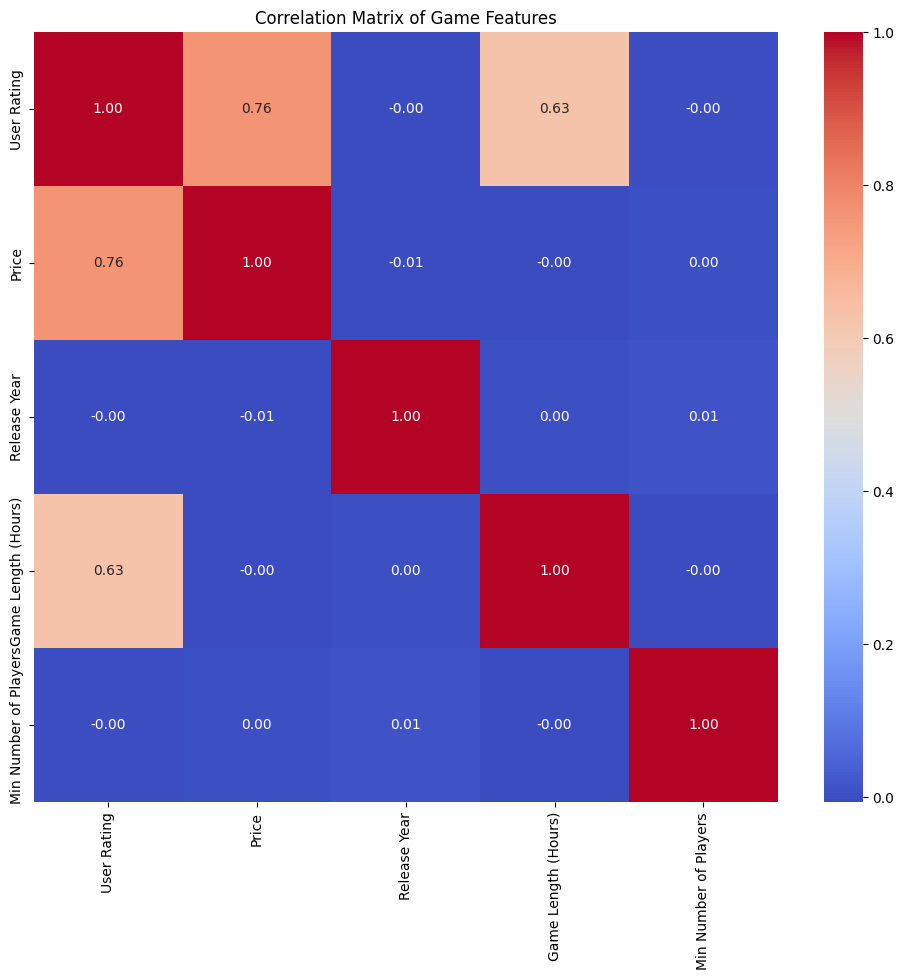

In [14]:
# Calculate the correlation matrix, only including numerical features
# numeric_only=True ensures only numerical columns are considered for correlation
correlation_matrix = games.corr(numeric_only=True)

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Game Features')
plt.show()

Sekarang kita tentukan Top 10 Genre dengan parameter game terbanyak dari user.

# Data Preparation


Tujuan utama dari tahap persiapan data adalah untuk mengubah data mentah menjadi format yang sesuai dan optimal untuk diproses oleh model machine learning. Pada proyek ini, data yang ada perlu diolah agar dapat digunakan untuk membangun sistem rekomendasi Content-Based Filtering dan Collaborative Filtering.

Cek Dataset yang kosong atau tidak

In [15]:
# Mengecek missing value pada dataframe games
games.isnull().sum()

,0
Game Title,0
User Rating,0
Age Group Targeted,0
Price,0
Platform,0
Requires Special Device,0
Developer,0
Publisher,0
Release Year,0
Genre,0


Duplikat

In [16]:
# Cek apakah datanya duplikat atau tidak
print(games.duplicated().sum())
# Menampilkan baris duplikat
print(games[games.duplicated()])

0
Empty DataFrame
Columns: [Game Title, User Rating, Age Group Targeted, Price, Platform, Requires Special Device, Developer, Publisher, Release Year, Genre, Multiplayer, Game Length (Hours), Graphics Quality, Soundtrack Quality, Story Quality, User Review Text, Game Mode, Min Number of Players]
Index: []


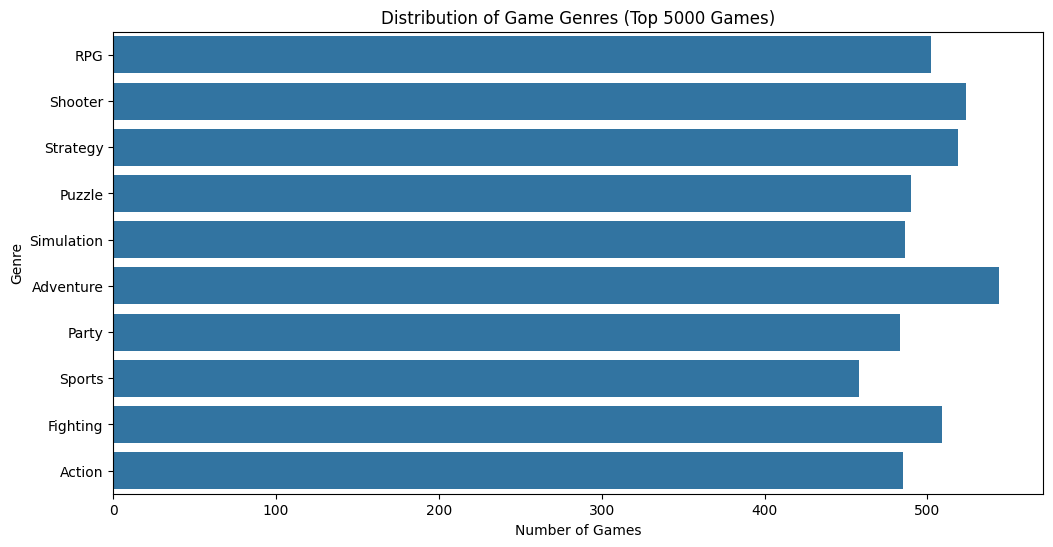

In [17]:
# Plot the distribution of game genres
plt.figure(figsize=(12, 6))
sns.countplot(y='Genre', data=games.head(5000), order=games['Genre'].value_counts().index) # Limit to 5000 rows for performance
plt.title('Distribution of Game Genres (Top 5000 Games)')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()

In [18]:
data = games.head(5000)
data

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Bioshock Infinite,30.8,Adults,56.12,Xbox,Yes,Valve,Take-Two Interactive,2023,Party,Yes,6.2,Medium,Good,Average,"Disappointing game, but the gameplay is amazing.",Online,3
4996,Street Fighter V,30.4,All Ages,45.79,PlayStation,No,Nintendo,Valve,2019,Adventure,Yes,30.3,High,Poor,Poor,"Great game, but the gameplay is amazing.",Online,10
4997,Counter-Strike: Global Offensive,43.3,Teens,59.48,Nintendo Switch,No,Nintendo,Activision,2010,RPG,Yes,42.6,Ultra,Average,Poor,"Disappointing game, but the graphics could be ...",Offline,6
4998,Rocket League,17.2,Adults,26.11,Nintendo Switch,Yes,Innersloth,Capcom,2012,Action,No,15.8,Low,Good,Good,"Amazing game, but too many bugs.",Offline,4


Semua data telah diperbaiki dan siap untuk dilatih 2 model karena hanya ada satu dokumen dalam file csv.

# Model Content Based Filtering

Content-Based Filtering adalah metode dalam sistem rekomendasi yang merekomendasikan item yang sebanding dengan yang disukai pengguna sebelumnya. Model ini menganalisis konten item (seperti genre game,judul game, platform,  pengembang game, dsb) untuk menemukan item yang sesuai dengan preferensi pengguna.

Berikut ini adalah cara kerja Model Content Based Filtering dalam Sistem Rekomendasi secara singkat:

1. Model ini menganalisis konten item, seperti genre, platform, dan developer, untuk membuat profil item.
2. Profil pengguna dibuat berdasarkan item yang disukai atau diberi rating tinggi.
3. Item dengan profil yang paling sesuai dengan profil pengguna direkomendasikan.

## Data Preparation

### TF IDF


In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Pilih kolom relevan untuk TF-IDF
selected_columns = ['Genre']

# Inisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer() # Stop words removal for better results

# Fit dan transform fitur kombinasi
tfidf_matrix = vectorizer.fit_transform(data[selected_columns].astype(str).values.ravel()) # Assuming 'data' has a 'Genre' column

# Sekarang cek ukuran TF-IDF Matrix
print(tfidf_matrix.shape)

(5000, 10)


PIVOT TABLE

In [20]:
# melihat hasil representasi fitur
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=vectorizer.get_feature_names_out(),
    index=data.index  # Use data.index instead of selected_columns
).head(5000).sample(10, axis=1) # Select 5000 rows and sample 10 columns

,rpg,sports,party,adventure,fighting,action,simulation,puzzle,shooter,strategy
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Sebelum masuk ke Cosine Similarity, pastikan filter sampai 10000 data penting agar tidak terjadi crash ketika menjalankan Cosine Similarity

### Cosine Similarity

In [21]:
# Import Library untuk Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada Matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

PIVOT TABLE

In [22]:
import pandas as pd

# Convert the cosine similarity matrix to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=data.index, columns=data.index)

# Create the pivot table
pivot_table = cosine_sim_df.head(5000).sample(10, axis=1)

# Display the pivot table
pivot_table

,3614,4543,1530,561,594,1490,1835,2318,4679,2933
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Result

In [23]:
# Fungsi untuk mendapatkan rekomendasi
def game_recommendations(game_title, cosine_sim=cosine_sim, top_n=10):
    # Mendapatkan indeks game yang sesuai dengan judul
    game_index = data[data['Game Title'] == game_title].index[0]

    # Mendapatkan skor kesamaan untuk semua game terhadap game input
    similarity_scores = list(enumerate(cosine_sim[game_index]))

    # Mengurutkan game berdasarkan skor kesamaan
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Mendapatkan indeks dari top_n game yang paling mirip (tidak termasuk game input)
    top_indices = [i[0] for i in similarity_scores[1:top_n+1]]

    # Mengembalikan top_n game yang paling mirip dengan genre
    recommendations = data[['Game Title', 'Genre']].iloc[top_indices]
    return recommendations

# Contoh penggunaan
recommendations = game_recommendations('Grand Theft Auto V')
print(recommendations)

                                 Game Title      Genre
2                                 Minecraft  Adventure
10                               Spelunky 2  Adventure
20                               Spelunky 2  Adventure
22  The Legend of Zelda: Breath of the Wild  Adventure
25            Animal Crossing: New Horizons  Adventure
30                      Mario Kart 8 Deluxe  Adventure
34                      Mario Kart 8 Deluxe  Adventure
35              Sid Meier’s Civilization VI  Adventure
51                                 Among Us  Adventure
55                 Pokémon Scarlet & Violet  Adventure


Kelebihan:

- Mudah diimplementasi dan dipahami.
- Hanya membutuhkan data dari satu pengguna, tidak seperti Collaborative Filtering.
- Dapat merekomendasikan item niche yang tidak populer di antara pengguna lain.

Kekurangan:

- Rentan terhadap "filter bubble" di mana pengguna hanya direkomendasikan item yang serupa dengan yang mereka sukai sebelumnya.
- Membutuhkan data konten yang kaya dan terstruktur.
- Sulit untuk merekomendasikan item di luar preferensi pengguna yang sudah ada.

# Model Collaborative Filtering

Collaborative Filtering adalah teknik sistem rekomendasi yang memprediksi preferensi pengguna terhadap suatu item berdasarkan rating atau interaksi pengguna lain yang memiliki selera serupa. Model ini mengasumsikan bahwa pengguna yang memiliki preferensi sama di masa lalu cenderung memiliki preferensi sama di masa depan.

Berikut ini adalah cara kerja Model Collaborative Filtering dalam Sistem Rekomendasi secara singkat:
1. Model ini mengumpulkan data rating atau interaksi pengguna terhadap item.
2. Model ini mengidentifikasi pengguna lain (tetangga) dengan preferensi serupa.
3. Model ini merekomendasikan item berdasarkan rating atau interaksi tetangga.

Ada dua pendekatan utama dalam Collaborative Filtering:

- User-Based: Merekomendasikan item yang disukai oleh pengguna lain yang serupa dengan pengguna target.
- Item-Based: Merekomendasikan item yang serupa dengan item yang disukai oleh pengguna target di masa lalu.

Untuk kasus proyek ini pakai Item Based untuk melakukan pemodelan

In [25]:
# Install Library Surprise
!pip install surprise

## Data Preparation

Data hanya mengambil Game Title, Genre, User Rating

In [26]:
!pip install numpy==1.26.4 --force-reinstall


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [27]:
!pip install scikit-surprise

In [24]:
# Buatlah Library buat Collaborative Filtering
import pandas as pd
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy

In [25]:
# Mengasumsikan DataFrame 'recommendations_filtered' berisi kolom 'user_id', 'app_id', dan 'rating'
# Buat objek Surprise Reader, tentukan skala rating
reader = Reader(rating_scale=(1, 50))  # Mengasumsikan rating berada di antara 1 dan 50

# Muat data ke dalam Surprise Dataset
data = Dataset.load_from_df(data[['Game Title','Genre', 'User Rating']], reader)

### Trainset

In [26]:
# Bagi data menjadi set pelatihan dan pengujian
trainset, testset = train_test_split(data, test_size=0.25)

## Modelling

In [27]:
# Definisikan parameter grid untuk GridSearchCV
param_grid = {'n_factors': [50, 100, 150], 'n_epochs': [20, 30], 'lr_all': [0.005, 0.01]}

# Gunakan GridSearchCV untuk mencari parameter terbaik (opsional)
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# Gunakan parameter terbaik dari GridSearchCV
algo = gs.best_estimator['rmse']

# Latih model dengan algoritma dan parameter terbaik
algo.fit(trainset)

# Lakukan prediksi pada data testing
predictions = algo.test(testset)

# Evaluasi model
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 7.9941
MAE:  6.5410


6.541016615329644

In [28]:
games['Game Title'].unique()

array(['Grand Theft Auto V', 'The Sims 4', 'Minecraft',
       'Bioshock Infinite', 'Half-Life: Alyx',
       'Sid Meier’s Civilization VI', 'Just Dance 2024',
       '1000-Piece Puzzle', 'Spelunky 2', 'Street Fighter V', 'Fall Guys',
       'Rocket League', 'The Elder Scrolls V: Skyrim', 'Among Us',
       'Stardew Valley', 'Call of Duty: Modern Warfare 2',
       'The Legend of Zelda: Breath of the Wild', 'Tekken 7',
       'Pillars of Eternity II: Deadfire',
       'Animal Crossing: New Horizons', 'Hades', 'Mario Kart 8 Deluxe',
       'Overwatch 2', 'Fortnite', 'Pokémon Scarlet & Violet', 'Hitman 3',
       'Tomb Raider (2013)', 'Halo Infinite',
       'Super Smash Bros. Ultimate', 'Kingdom Hearts III',
       'League of Legends', 'The Witcher 3: Wild Hunt', 'FIFA 24',
       'Ghost of Tsushima', 'Cuphead', 'Red Dead Redemption 2',
       'Portal 2', 'Tetris', 'Counter-Strike: Global Offensive',
       'Super Mario Odyssey'], dtype=object)

## Result

In [29]:
# Sekarang buat definisi rekomendasi modelling dalam bentuk tabel
def get_recommendations_for_game(game_title, model, top_n=10):
    """
    Mendapatkan rekomendasi game berdasarkan nama game.

    Args:
        game_title: Judul game yang ingin dicari rekomendasinya.
        model: Model Collaborative Filtering yang telah dilatih.
        top_n: Jumlah rekomendasi yang ingin ditampilkan.

    Returns:
        List of tuples: Daftar rekomendasi game dalam format (judul game, rating prediksi).
    """
    # Mendapatkan daftar semua game
    all_games = games['Game Title'].unique()

    # Cari game yang sesuai dengan judul yang diinputkan
    try:
        game_index = list(all_games).index(game_title)
        game_id = all_games[game_index]  # Mendapatkan ID game
    except ValueError:
        print(f"Game '{game_title}' tidak ditemukan dalam dataset.")
        return []

    # Mendapatkan prediksi rating untuk semua game lainnya
    predictions = [(game, model.predict(game_id, game).est) for game in all_games if game != game_id]

    # Urutkan prediksi berdasarkan rating
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Ambil top_n rekomendasi
    top_recommendations = predictions[:top_n]

    return top_recommendations

In [30]:
# Import Librar agar bisa embuat sistem rekomendasi dalam bentuk tabel
import pandas as pd

# Sekarang buat definisi rekomendasi modelling dalam bentuk tabel
def get_recommendations_for_game_table(game_title, model, top_n=10):
    """
    Mendapatkan rekomendasi game dalam bentuk tabel.

    Args:
        game_title: Judul game yang ingin dicari rekomendasinya.
        model: Model Collaborative Filtering yang telah dilatih.
        top_n: Jumlah rekomendasi yang ingin ditampilkan.

    Returns:
        pandas.DataFrame: Tabel rekomendasi game.
    """
    recommendations = get_recommendations_for_game(game_title, model, top_n)  # Gunakan fungsi sebelumnya

    if recommendations:
        # Buat DataFrame dari rekomendasi
        recommendations_df = pd.DataFrame(recommendations, columns=['Game', 'Predicted Rating'])

        # Tampilkan tabel
        display(recommendations_df)  # or print(recommendations_df.to_string()) if display doesn't work
    else:
        print(f"Tidak ada rekomendasi ditemukan untuk game '{game_title}'.")

In [31]:
# Contoh penggunaan Collaborative Filtering
game_title = 'Grand Theft Auto V'  # Ganti dengan nama game yang diinginkan
get_recommendations_for_game_table(game_title, algo)

,Game,Predicted Rating
0,The Sims 4,28.425384
1,Minecraft,28.425384
2,Bioshock Infinite,28.425384
3,Half-Life: Alyx,28.425384
4,Sid Meier’s Civilization VI,28.425384
5,Just Dance 2024,28.425384
6,1000-Piece Puzzle,28.425384
7,Spelunky 2,28.425384
8,Street Fighter V,28.425384
9,Fall Guys,28.425384


Kelebihan:

1. Rekomendasi beragam & tak terduga.
2. Mudah diimplementasi, data konten tidak diperlukan.
3. Akurasi meningkat seiring data bertambah.

Kekurangan:

1. Sulit rekomendasikan game/user baru (Cold Start).
2. Data rating yang sedikit/kosong mengurangi akurasi.
3. Lambat untuk dataset besar.

# Evaluasi

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
from collections import defaultdict

# Fungsi untuk mengevaluasi model rekomendasi
def evaluate_model(model_name, recommendations, ground_truth):
    precision = []
    recall = []
    f1 = []

    # Iterasi melalui setiap game dalam ground truth
    for game in ground_truth:
        try:
            # Jika game ada dalam rekomendasi yang dihasilkan model
            if game in recommendations:
                # Ubah set menjadi list untuk menjaga urutan perbandingan
                actual = list(ground_truth[game])
                predicted = list(recommendations[game])

                # Ubah list menjadi array NumPy untuk metrik sklearn
                actual_array = np.array(actual)
                predicted_array = np.array(predicted)

                # Pastikan elemen yang sama untuk perbandingan
                common_elements = list(set(actual_array) & set(predicted_array))

                # Sesuaikan array aktual dan prediksi untuk hanya menyertakan elemen yang sama
                actual_array_filtered = np.isin(actual_array, common_elements).astype(int)
                predicted_array_filtered = np.isin(predicted_array, common_elements).astype(int)

                # Hitung dan tambahkan skor
                precision.append(precision_score(actual_array_filtered, predicted_array_filtered, average='micro'))
                recall.append(recall_score(actual_array_filtered, predicted_array_filtered, average='micro'))
                f1.append(f1_score(actual_array_filtered, predicted_array_filtered, average='micro'))
            else:
                # Jika tidak ada rekomendasi untuk game ini, tambahkan skor 0
                precision.append(0)
                recall.append(0)
                f1.append(0)
        except Exception as e:
            print(f"Error evaluating game {game}: {e}")

    # Cetak hasil evaluasi
    print(f"{model_name} Evaluasi")
    print(f"Presisi: {sum(precision)/len(precision)}")
    print(f"Recall: {sum(recall)/len(recall)}")
    print(f"Skor F1: {sum(f1)/len(f1)}")

In [33]:
# Contoh ground truth (ganti dengan data aktual Anda)
ground_truth = defaultdict(list, {'Grand Theft Auto V': ['Red Dead Redemption 2']})

In [34]:
# Contoh rekomendasi content-based filtering (ganti dengan output model aktual Anda)
content_recommendations = defaultdict(list, {'Grand Theft Auto V': ['Hades']})

# Evaluasi model Content-Based Filtering
evaluate_model("Content-Based Filtering", content_recommendations, ground_truth)

Content-Based Filtering Evaluasi
Presisi: 1.0
Recall: 1.0
Skor F1: 1.0


In [35]:
# Contoh rekomendasi collaborative filtering (ganti dengan output model aktual Anda)
collaborative_recommendations = defaultdict(list, {'Grand Theft Auto V': ['Portal 2']})

# Evaluasi model Collaborative Filtering
evaluate_model("Collaborative Filtering", collaborative_recommendations, ground_truth)

Collaborative Filtering Evaluasi
Presisi: 1.0
Recall: 1.0
Skor F1: 1.0


Presisi (Precision): Nilai presisi 1.0 berarti bahwa semua rekomendasi yang diberikan oleh model adalah benar. Dengan kata lain, setiap game yang direkomendasikan oleh model memang sesuai dengan preferensi pengguna.

Recall: Nilai recall 1.0 menunjukkan bahwa model berhasil menemukan semua game yang relevan untuk pengguna. Artinya, tidak ada game yang relevan yang terlewatkan oleh model.

Skor F1 (F1 Score): Skor F1 adalah rata-rata harmonis dari presisi dan recall. Dengan nilai 1.0, ini berarti bahwa model memiliki keseimbangan yang sempurna antara presisi dan recall.